In [1]:
#引入stats，查看stats包含哪些离散型随机变量分布
from scipy import stats
print([k for k,v in stats.__dict__.items() if isinstance(v,stats.rv_discrete)])

['binom', 'bernoulli', 'betabinom', 'nbinom', 'geom', 'hypergeom', 'logser', 'poisson', 'planck', 'boltzmann', 'randint', 'zipf', 'dlaplace', 'skellam', 'yulesimon']


In [2]:
#(一) (0-1)分布

In [3]:
#引入bernoulli分布
from scipy.stats import bernoulli
p=0.3
#bernoulli(p)指参数为p的（0—1）分布，如需多次调用可将其“冻结”起来，即赋给rv，以简化后方代码
rv=bernoulli(p) 
#rv. rvs(size=10,random_state=0)从服从参数为p的（0—1）分布中生成10个随机变量值，随机种子为0
rv.rvs(size=10,random_state=0)  

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [4]:
#100000个随机变量值中1所占的比例
sum(rv.rvs(size=100000))/100000

0.30077

In [5]:
#(二) 二项分布

In [6]:
from scipy.stats import binom
n,p=5,0.3
x=[0,1,2,3,4,5]
# rv服从参数为n=5，p=0.3的二项分布
rv=binom(n,p)
#rv.pmf(x)返回rv取值为0，1，2，3，4，5时的概率值
rv.pmf(x)

array([0.16807, 0.36015, 0.3087 , 0.1323 , 0.02835, 0.00243])

In [7]:
#comb用于计算组合数
from scipy.special import comb
n,p=5,0.3
for k in range(6):
    print('{:.5f}'.format(comb(n,k)*p**k*(1-p)**(n-k)),end=' ')

0.16807 0.36015 0.30870 0.13230 0.02835 0.00243 

In [8]:
# 例14.2

In [9]:
from scipy.stats import binom
n,p=20,0.2
rv=binom(n,p)
#用列表解析式生成列表
[(k,rv.pmf(k)) for k in range(11)]

[(0, 0.01152921504606847),
 (1, 0.057646075230342306),
 (2, 0.136909428672063),
 (3, 0.2053641430080944),
 (4, 0.21819940194610007),
 (5, 0.1745595215568796),
 (6, 0.10909970097304993),
 (7, 0.0545498504865252),
 (8, 0.022160876760150824),
 (9, 0.007386958920050272),
 (10, 0.002031413703013826)]

In [10]:
#图14.8

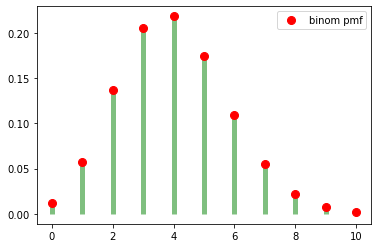

In [11]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(11)
#subplots用于一个图中需绘制多个子图的情况
fig,ax=plt.subplots(1,1)
#绘制散点图
ax.plot(x,rv.pmf(x),'ro',ms=8,label='binom pmf')  
#绘制垂直线
ax.vlines(x,0,rv.pmf(x),colors='g',lw=5,alpha=0.5)  
#添加图例
ax.legend()  
#显示图形 
plt.show()  

In [12]:
#例14.3

In [13]:
from scipy.stats import binom
#x用于存放击中次数
x=[0,1]
n,p=400,0.02
#sum([binom.pmf(k,n,p) for k in x])指“没有击中或只击中一次”的概率
1-sum([binom.pmf(k,n,p) for k in x])

0.9971654733929229

In [14]:
#泊松分布

In [15]:
from scipy.stats import poisson
lamda=0.3
#参数为lamda的泊松分布
rv=poisson(lamda)  
x=np.arange(5)
#rv取0到4时所相应的概率
k_prbs=[[k,rv.pmf(k)] for k in x]
k_prbs,'Sum probability is {:.6f} from k=0 to k=4.'\
    .format(np.sum(np.array(k_prbs)[:,1]))

([[0, 0.7408182206817179],
  [1, 0.22224546620451532],
  [2, 0.033336819930677296],
  [3, 0.0033336819930677277],
  [4, 0.00025002614948007934]],
 'Sum probability is 0.999984 from k=0 to k=4.')

In [16]:
#例1.4

In [17]:
from scipy.stats import binom
from scipy.stats import poisson
n,p=1000,0.001
rv_binom=binom(n,p)
lamda=1  # n*p=1
rv_poisson=poisson(lamda)
x=[0,1]
1-sum(rv_poisson.pmf(x)),1-sum(rv_binom.pmf(x))

(0.26424111765711533, 0.2642410869694465)